In [3]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# GP results for simulated data
GP_1 = pd.read_csv('./04_Simulated_result/GP/GP_Criteria_1.csv')
GP_2 = pd.read_csv('./04_Simulated_result/GP/GP_Criteria_2_fixed.csv')
GP_3 = pd.read_csv('./04_Simulated_result/GP/GP_result_Criteria_3.csv')

GP_1 = GP_1.iloc[:,1:]
GP_3 = GP_3.iloc[:,1:]
GP_3

,Period,SNR,nSNR,LLR,0
0,24.0,6.782434,2.282478,0.901435,0.0025
1,24.0,26.739393,10.414784,2.031237,0.0025
2,24.0,13.905056,4.781032,1.695830,0.0025
3,24.0,13.754942,5.869703,1.726507,0.0025
4,24.0,12.320056,4.147012,1.435101,0.0025
...,...,...,...,...,...
995,24.0,2.464138,0.990719,-0.537913,0.2500
996,24.0,3.683667,1.252250,-0.520364,0.2500
997,24.0,2.389568,0.817588,-1.775771,0.2500
998,15.0,2.405504,1.202752,-0.882550,0.2500


In [9]:
# JTK results for simulated data
JTK_1 = pd.read_csv('./04_Simulated_result/JTK_CYCLE/Criteria_1_JTK.csv')
JTK_2 = pd.read_csv('./04_Simulated_result/JTK_CYCLE/Criteria_2_JTK.csv')
JTK_3 = pd.read_csv('./04_Simulated_result/JTK_CYCLE/Criteria_3_JTK.csv')

JTK_1 = JTK_1.iloc[:,1:]
JTK_2 = JTK_2.iloc[:,1:]
JTK_3 = JTK_3.iloc[:,1:]

JTK_3

,annot,BH.Q,ADJ.P,PER,LAG,AMP
0,0.0025,5.970260e-08,9.194201e-09,24,7.5,0.320366
1,0.0025,5.970260e-08,9.194201e-09,24,3.0,0.935833
2,0.0025,1.854179e-13,1.854179e-16,24,13.5,0.676589
3,0.0025,1.404602e-07,2.668743e-08,24,1.5,0.762491
4,0.0025,2.353121e-08,2.964933e-09,24,21.0,0.696598
...,...,...,...,...,...,...
995,0.2500,9.418548e-02,7.497164e-02,24,7.5,0.489395
996,0.2500,9.658253e-04,5.167165e-04,24,7.5,1.040358
997,0.2500,3.268544e-02,2.369695e-02,24,6.0,0.307919
998,0.2500,6.499852e-01,5.960364e-01,15,9.0,0.251365


In [10]:
# Rain results for simulated data
RAIN_1 = pd.read_csv('./04_Simulated_result/RAIN/Criteria_1_RAIN.csv')
RAIN_2 = pd.read_csv('./04_Simulated_result/RAIN/Criteria_2_RAIN.csv')
RAIN_3 = pd.read_csv('./04_Simulated_result/RAIN/Criteria_3_RAIN.csv')

RAIN_3

,annot,pVal,phase,peak.shape,period
0,0.0025,3.393467e-11,9,12,24
1,0.0025,2.565090e-13,6,9,24
2,0.0025,9.798449e-15,15,12,24
3,0.0025,4.290313e-14,6,9,24
4,0.0025,4.290313e-14,21,15,24
...,...,...,...,...,...
995,0.2500,2.028990e-03,12,6,24
996,0.2500,3.177508e-04,6,18,24
997,0.2500,1.788833e-04,6,15,24
998,0.2500,3.492195e-02,12,3,15


In [11]:
# Criteria 1 - F1 score on circadian vs non circadian

threshold = np.arange(start = GP_1['LLR'].min(), stop =  GP_1['LLR'].max(), step = 0.01)
F1 = []
for x in threshold:
    llr = list(GP_1['LLR'])
    A_R = [int(u >= x) for u in llr] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(GP_1)):
        if (GP_1['Period'][j] == 24) & (GP_1['0'][j] == 'Circadian'):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(GP_1)):
        if (GP_1['Period'][j] == 24) & (GP_1['0'][j] == 'Non-circadian'):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(GP_1)):
        if (GP_1['Period'][j] != 24) & (GP_1['0'][j] == 'Circadian'):
            if A_R[j] == 1:
                FN += 1
    for j in range(len(GP_1)):
        if (GP_1['Period'][j] == 24) & (GP_1['0'][j] == 'Circadian'):
            if A_R[j] != 1:
                FN += 1
    
    precision = (TP/(TP+FP))
    recall = (TP/(TP+FN))
    F1.append(2*(precision*recall)/(precision+recall))

In [12]:
p_values =  np.linspace(np.log10(JTK_1['ADJ.P'].min()),np.log10(JTK_1['ADJ.P'].max()),len(threshold))[::-1]
F1_JTK = []
for x in p_values:
    pvalue = list(np.log10(JTK_1['ADJ.P']))
    A_R = [int(u <= x) for u in pvalue] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(JTK_1)):
        if (JTK_1['PER'][j] == 24) & (JTK_1['annot'][j] == 'Circadian'):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(JTK_1)):
        if (JTK_1['PER'][j] == 24) & (JTK_1['annot'][j] == 'Non-circadian'):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(JTK_1)):
        if (JTK_1['PER'][j] != 24) & (JTK_1['annot'][j] == 'Circadian'):
            if A_R[j] == 1:
                FN += 1
    for j in range(len(JTK_1)):
        if (JTK_1['PER'][j] == 24) & (JTK_1['annot'][j] == 'Circadian'):
            if A_R[j] != 1:
                FN += 1
    precision = (TP/(TP+FP))
    recall = (TP/(TP+FN))
    F1_JTK.append(2*(precision*recall)/(precision+recall))

In [13]:
p_vals = np.linspace(np.log10(RAIN_1['pVal'].min()),np.log10(RAIN_1['pVal'].max()),len(threshold))[::-1]
F1_RAIN = []
for x in p_vals:
    pval = list(np.log10(RAIN_1['pVal']))
    A_R = [int(u <= x) for u in pval] # accept and reject
    TP = 0
    FP = 0
    FN = 0
    for j in range(len(RAIN_1)):
        if (RAIN_1['period'][j] == 24) & (RAIN_1['annot'][j] == 'Circadian'):
            if A_R[j] == 1:
                TP +=1
    for j in range(len(RAIN_1)):
        if (RAIN_1['period'][j] == 24) & (RAIN_1['annot'][j] == 'Non-circadian'):
            if A_R[j] == 1:
                FP += 1
    for j in range(len(RAIN_1)):
        if (RAIN_1['period'][j] != 24) & (RAIN_1['annot'][j] == 'Circadian'):
            if A_R[j] == 1:
                FN += 1
    for j in range(len(RAIN_1)):
        if (RAIN_1['period'][j] == 24) & (RAIN_1['annot'][j] == 'Circadian'):
            if A_R[j] != 1:
                FN += 1
        
    precision = (TP/(TP+FP))
    recall = (TP/(TP+FN))
    F1_RAIN.append(2*(precision*recall)/(precision+recall))

Text(0.5, 1.0, 'F1_score between circadian rhythm detection methods')

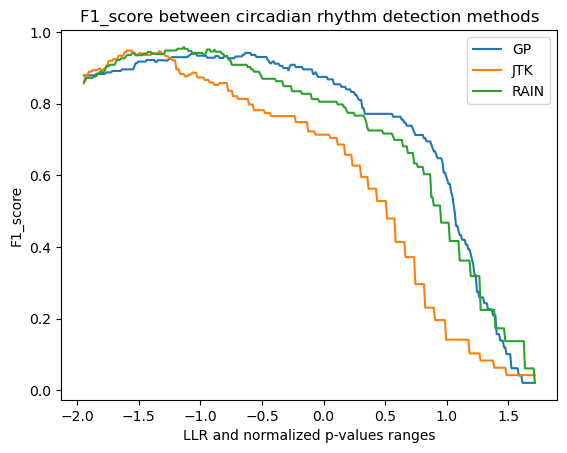

In [14]:
plt.plot(threshold,F1,label="GP")
plt.plot(threshold,F1_JTK,label="JTK")
plt.plot(threshold,F1_RAIN,label="RAIN")
plt.legend()

plt.xlabel('LLR and normalized p-values ranges')
plt.ylabel('F1_score')
plt.title('F1_score between circadian rhythm detection methods')
#plt.savefig("F1_score.png")

In [15]:
print(np.max(F1))

0.9411764705882353


In [16]:
print(10 ** p_values[np.argmax(F1_JTK)+1])
print(threshold[np.argmax(F1_JTK)])
print(np.max(F1_JTK))

0.05589890174910503
-1.5955181757609047
0.9479166666666666


In [17]:
print(10 ** p_vals[np.argmax(F1_RAIN)+1])
print(threshold[np.argmax(F1_RAIN)])
print(np.max(F1_RAIN))

0.0006048140801546601
-1.1355181757609043
0.9578947368421052


In [18]:
print(np.max(F1))
print(np.max(F1_JTK))
print(np.max(F1_RAIN))

print(F1.index(max(F1)))
print('The best threshold of LLR is:'+ str(threshold[F1.index(max(F1))]))
print(F1_JTK.index(max(F1_JTK)))
print('The best threshold of pvalues is:'+ str(10 ** p_values[F1_JTK.index(max(F1_JTK))]))
print(F1_RAIN.index(max(F1_RAIN)))
print('The best threshold of pVal is:'+ str(10 ** p_values[F1_RAIN.index(max(F1_RAIN))]))

0.9411764705882353
0.9479166666666666
0.9578947368421052
131
The best threshold of LLR is:-0.6355181757609039
35
The best threshold of pvalues is:0.060561640213244186
81
The best threshold of pVal is:0.0015193483884141151


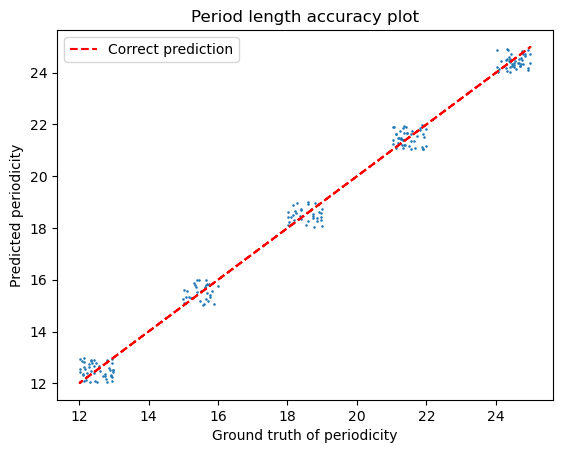

The MSE loss of GP model in the simulated data is: 0.16691090506795755


In [20]:
from collections import Counter
x = list(GP_2['0'])
x = [i+ np.random.rand(1)  for i in x]
y = list(GP_2['Period'])
y = [i+ np.random.rand(1)  for i in y]

plt.scatter(x,y, marker='o', s=0.7)
plt.plot(x,x,'--', label = 'Correct prediction', color = 'r')
plt.legend()
plt.xlabel('Ground truth of periodicity')
plt.ylabel('Predicted periodicity')
plt.title('Period length accuracy plot')
plt.show()
MSE_GP = ((np.array(x)-np.array(y))**2).mean()
print('The MSE loss of GP model in the simulated data is: '+ str(MSE_GP))

The MSE loss of GP model in the simulated data is: 0.0


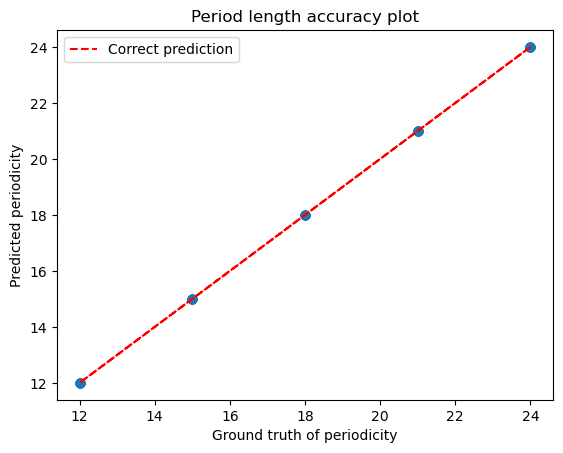

In [11]:
# Criteria 2 - R2 loss and acuracy of periods
from collections import Counter
x = list(GP_2['0'])
y = list(GP_2['Period'])

plt.scatter(x,y)
plt.plot(x,x,'--', label = 'Correct prediction', color = 'r')
plt.legend()
plt.xlabel('Ground truth of periodicity')
plt.ylabel('Predicted periodicity')
plt.title('Period length accuracy plot')

MSE_GP = ((np.array(x)-np.array(y))**2).mean()
print('The MSE loss of GP model in the simulated data is: '+ str(MSE_GP))

The MSE loss of JTK model in the simulated data is: 1.035


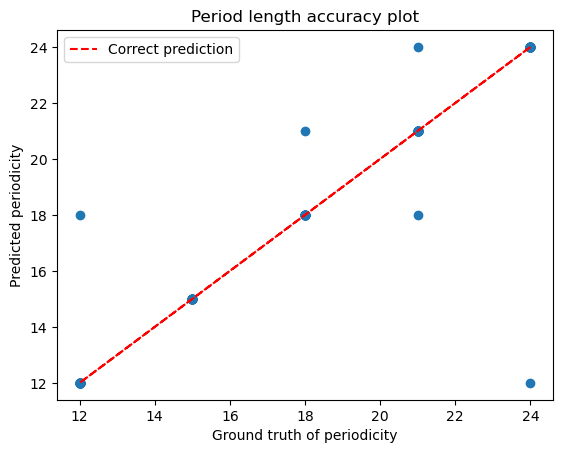

In [12]:
x = list(JTK_2['annot'])
y = list(JTK_2['PER'])
plt.scatter(x,y)
plt.plot(x,x,'--', label = 'Correct prediction',color = 'r')
plt.legend()
plt.xlabel('Ground truth of periodicity')
plt.ylabel('Predicted periodicity')
plt.title('Period length accuracy plot')

MSE_JTK = ((np.array(x)-np.array(y))**2).mean()
print('The MSE loss of JTK model in the simulated data is: '+ str(MSE_JTK))

The MSE loss of RAIN model in the simulated data is: 0.045


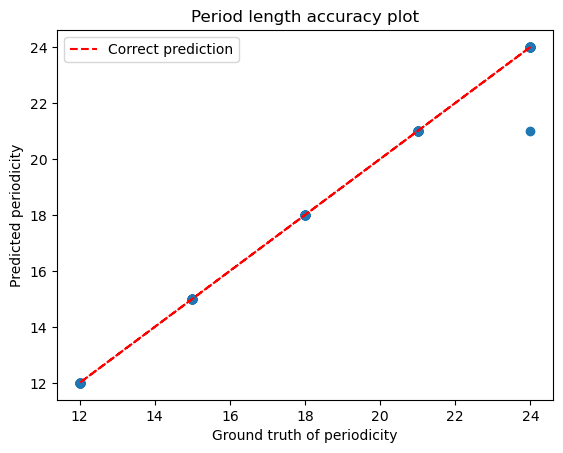

In [13]:
x = list(RAIN_2['annot'])
y = list(RAIN_2['period'])
plt.scatter(x,y)
plt.plot(x,x,'--', label = 'Correct prediction',color = 'r')
plt.legend()
plt.xlabel('Ground truth of periodicity')
plt.ylabel('Predicted periodicity')
plt.title('Period length accuracy plot')

MSE_RAIN = ((np.array(x)-np.array(y))**2).mean()
print('The MSE loss of RAIN model in the simulated data is: '+ str(MSE_RAIN))

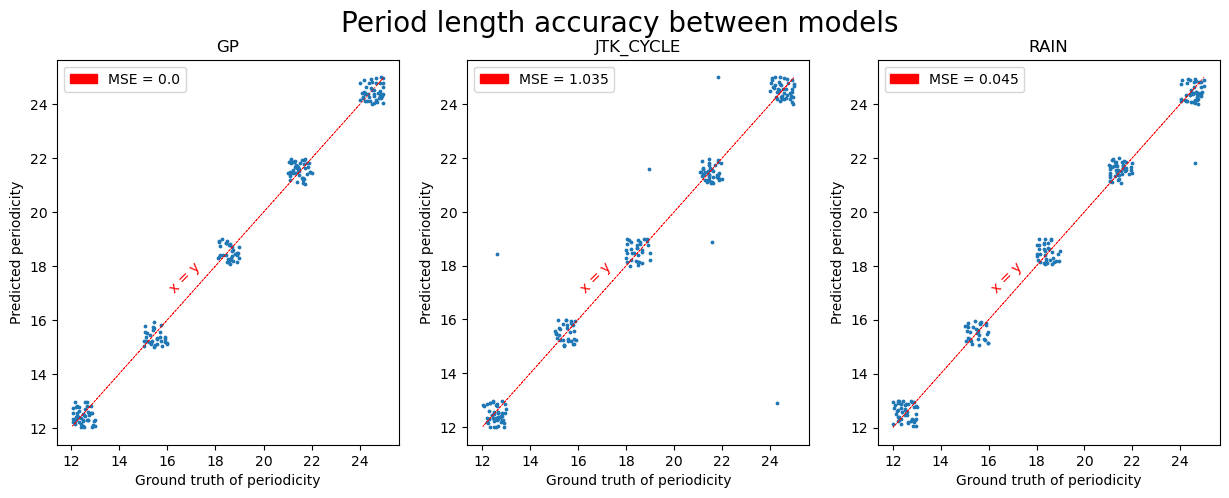

In [51]:
import matplotlib.patches as mpatches
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
true_x = list(GP_2['0'])
x = [i+ np.random.rand(1)  for i in true_x]
true_y = list(GP_2['Period'])
y = [i+ np.random.rand(1)  for i in true_y]

plt.scatter(x,y, marker='o', s= 3)
plt.plot(x,x,'--', label = 'Correct prediction', color = 'r',linewidth=0.5)
red_patch = mpatches.Patch(color='red',label= f'MSE = {((np.array(true_x)-np.array(true_y))**2).mean()}')
plt.legend(handles=[red_patch])
plt.xlabel('Ground truth of periodicity')
plt.ylabel('Predicted periodicity')
plt.text(16, 17, 'x = y', color = 'r',rotation = 45)
plt.title('GP')

MSE_GP = ((np.array(x)-np.array(y))**2).mean()

plt.subplot(1, 3, 2)
true_x = list(JTK_2['annot'])
x = [i+ np.random.rand(1)  for i in true_x]
true_y = list(JTK_2['PER'])
y = [i+ np.random.rand(1)  for i in true_y]
plt.scatter(x,y,marker='o', s=3)
plt.plot(x,x,'--', label = 'Correct prediction',color = 'r',linewidth=0.5)
red_patch = mpatches.Patch(color='red',label= f'MSE = {((np.array(true_x)-np.array(true_y))**2).mean()}')
plt.legend(handles=[red_patch])
plt.xlabel('Ground truth of periodicity')
plt.ylabel('Predicted periodicity')
plt.text(16, 17, 'x = y', color = 'r',rotation = 45)
plt.title('JTK_CYCLE')

MSE_JTK = ((np.array(x)-np.array(y))**2).mean()


plt.subplot(1, 3, 3)
true_x = list(RAIN_2['annot'])
x = [i+ np.random.rand(1)  for i in true_x]
true_y = list(RAIN_2['period'])
y = [i+ np.random.rand(1)  for i in true_y]
plt.scatter(x,y,marker='o', s=3)
plt.plot(x,x,'--', label = 'Correct prediction',color = 'r',linewidth=0.5)
red_patch = mpatches.Patch(color='red',label= f'MSE = {((np.array(true_x)-np.array(true_y))**2).mean()}')
plt.legend(handles=[red_patch])
plt.xlabel('Ground truth of periodicity')
plt.ylabel('Predicted periodicity')
plt.text(16, 17, 'x = y', color = 'r',rotation = 45)
plt.title('RAIN')

plt.suptitle("Period length accuracy between models",fontsize=20)
plt.savefig("Period_length_acc.png")

In [15]:
# Criteria 3 - Accuracy plot as we increase the noise level
GP_3

,Period,SNR,nSNR,LLR,0
0,24.0,5.870615,2.529118,1.139225,0.001
1,24.0,16.205730,6.932203,1.501377,0.001
2,24.0,25.540797,10.987859,1.993800,0.001
3,24.0,14.361155,5.901845,1.610333,0.001
4,24.0,5.789068,2.407006,0.705947,0.001
...,...,...,...,...,...
695,24.0,1.751792,0.562485,-0.967336,1.000
696,22.0,1.256786,0.475134,-1.420716,1.000
697,20.0,1.381863,0.662865,-1.613487,1.000
698,22.0,2.346574,0.758748,-1.962014,1.000


In [16]:
GP_3

,Period,SNR,nSNR,LLR,0
0,24.0,5.870615,2.529118,1.139225,0.001
1,24.0,16.205730,6.932203,1.501377,0.001
2,24.0,25.540797,10.987859,1.993800,0.001
3,24.0,14.361155,5.901845,1.610333,0.001
4,24.0,5.789068,2.407006,0.705947,0.001
...,...,...,...,...,...
695,24.0,1.751792,0.562485,-0.967336,1.000
696,22.0,1.256786,0.475134,-1.420716,1.000
697,20.0,1.381863,0.662865,-1.613487,1.000
698,22.0,2.346574,0.758748,-1.962014,1.000


In [22]:
def divide_chunks(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]
#x = list(divide_chunks(TP, 100))
#print(len(x))

In [27]:
TP = [0] * len(GP_3)
FP = [0] * len(GP_3)

llr = list(GP_3['LLR'])
A_R = [int(u >= -1) for u in llr]



for j in range(len(GP_3)):
    if (GP_3['Period'][j] == 24):
        if A_R[j] == 1:
            TP[j] = 1
for j in range(len(GP_3)):
    if (GP_3['Period'][j] != 24):
        if A_R[j] == 1:
            FP[j] = 1

TP_reduce = list(divide_chunks(TP, 100))
FP_reduce = list(divide_chunks(FP, 100))

TP_GP = [sum(i) for i in TP_reduce]
FP_GP = [sum(i) for i in FP_reduce]
precision_GP = np.array(TP_GP)/(np.array(TP_GP)+np.array(FP_GP))
print(TP_GP)
print(FP_GP)
print(precision_GP)

[97, 98, 95, 87, 73, 81, 65, 54, 48, 50]
[3, 2, 1, 2, 4, 6, 2, 3, 2, 8]
[0.97       0.98       0.98958333 0.97752809 0.94805195 0.93103448
 0.97014925 0.94736842 0.96       0.86206897]


In [28]:
#Plot
TP = [0] * len(JTK_3)
FP = [0] * len(JTK_3)

pvalues = list(JTK_3['ADJ.P'])
A_R = [int(u < 0.05) for u in pvalues]


for j in range(len(JTK_3)):
    if (JTK_3['PER'][j] == 24):
        if A_R[j] == 1:
            TP[j] = 1
for j in range(len(JTK_3)):
    if (JTK_3['PER'][j] != 24):
        if A_R[j] == 1:
            FP[j] = 1

TP_reduce = list(divide_chunks(TP, 100))
FP_reduce = list(divide_chunks(FP, 100))

TP_JTK = [sum(i) for i in TP_reduce]
FP_JTK = [sum(i) for i in FP_reduce]
precision_JTK = np.array(TP_JTK)/(np.array(TP_JTK)+np.array(FP_JTK))
print(TP_JTK)
print(FP_JTK)
print(precision_JTK)

[93, 97, 92, 82, 70, 80, 66, 58, 48, 47]
[7, 2, 2, 3, 3, 5, 0, 2, 1, 3]
[0.93       0.97979798 0.9787234  0.96470588 0.95890411 0.94117647
 1.         0.96666667 0.97959184 0.94      ]


In [29]:
TP = [0] * len(RAIN_3)
FP = [0] * len(RAIN_3)

pvals = list(RAIN_3['pVal'])
A_R = [int(u < 0.01) for u in pvals]


for j in range(len(JTK_3)):
    if (RAIN_3['period'][j] == 24):
        if A_R[j] == 1:
            TP[j] = 1
for j in range(len(JTK_3)):
    if (RAIN_3['period'][j] != 24):
        if A_R[j] == 1:
            FP[j] = 1

TP_reduce = list(divide_chunks(TP, 100))
FP_reduce = list(divide_chunks(FP, 100))

TP_RAIN = [sum(i) for i in TP_reduce]
FP_RAIN = [sum(i) for i in FP_reduce]
precision_RAIN = np.array(TP_RAIN)/(np.array(TP_RAIN)+np.array(FP_RAIN))
print(TP_RAIN)
print(FP_RAIN)
print(precision_RAIN)

[98, 98, 97, 89, 73, 81, 72, 64, 54, 60]
[2, 2, 1, 2, 5, 5, 1, 5, 3, 5]
[0.98       0.98       0.98979592 0.97802198 0.93589744 0.94186047
 0.98630137 0.92753623 0.94736842 0.92307692]


Text(0.5, 1.0, 'Precision between models with different noise levels')

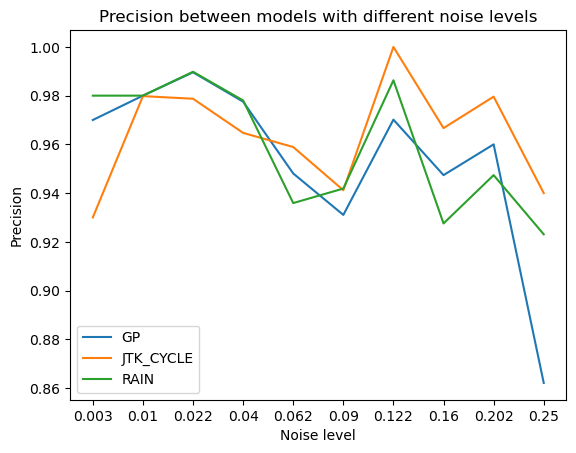

In [35]:
noise = np.round(np.power([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],2),3)

default_x_ticks = range(len(noise))
plt.plot(default_x_ticks,precision_GP, label ='GP')
plt.plot(default_x_ticks,precision_JTK, label = 'JTK_CYCLE')
plt.plot(default_x_ticks,precision_RAIN,label = 'RAIN')
plt.xticks(default_x_ticks, noise)
plt.legend()
plt.xlabel('Noise level')
plt.ylabel('Precision')
plt.title('Precision between models with different noise levels')

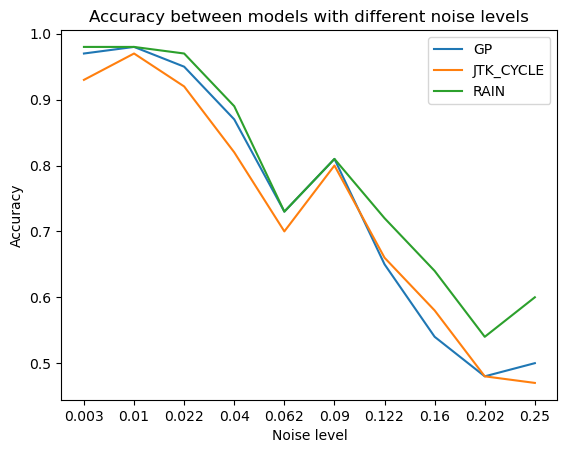

In [37]:
noise = np.round(np.power([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],2),3)

default_x_ticks = range(len(noise))
plt.plot(default_x_ticks,[x / 100 for x in TP_GP], label ='GP')
plt.plot(default_x_ticks,[x / 100 for x in TP_JTK], label = 'JTK_CYCLE')
plt.plot(default_x_ticks,[x / 100 for x in TP_RAIN],label = 'RAIN')
plt.xticks(default_x_ticks, noise)
plt.legend()
plt.xlabel('Noise level')
plt.ylabel('Accuracy')
plt.title('Accuracy between models with different noise levels')
plt.savefig("Accuracy_noise_fixed.png")

In [30]:
GP_3[(GP_3['LLR'] < -1) & (GP_3['0'] == 0.1)]

,Period,SNR,nSNR,LLR,0
407,16.0,3.953687,1.976843,-1.749727,0.1
409,22.0,4.188565,1.524201,-1.492759,0.1
410,24.0,1.515508,0.613334,-1.080477,0.1
412,24.0,2.548800,0.937703,-1.019149,0.1
415,16.0,1.648713,0.824356,-1.816380,0.1
418,14.0,3.005935,1.502967,-1.249918,0.1
419,24.0,1.791359,0.506722,-1.654785,0.1
424,16.0,2.720744,1.360372,-1.380433,0.1
427,22.0,2.007293,0.813916,-1.355860,0.1
441,16.0,1.886976,0.943488,-1.721633,0.1


In [ ]:
GP_2[(GP_2['Period'] == 12) & (GP_2['0'] == 12)]